In [30]:
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import pickle
from pathlib import Path
import torch
import matplotlib.pyplot as plt

from neuralhydrology.modelzoo import get_model
from neuralhydrology.utils.config import Config

In [2]:
# ------- Paths -------
model_dir=Path('../CHIRPS_2.0/runs/gauge_and_chirps_precip_seq_270_30_epochs_seq_270_hidden_256_dropout_04_fb_05_seed111_0402_180903')
pickle_file_dir = model_dir / 'validation' / 'model_epoch030' / 'validation_results.p'
pt_file_dir = model_dir / 'model_epoch030.pt'

In [3]:
# Open pickle file
with open(pickle_file_dir, 'rb') as f:
    data = pickle.load(f)

# Inspect contents
print(type(data))
print(data.keys() if isinstance(data, dict) else data)

<class 'dict'>
dict_keys(['CAMELS_UY_10', 'CAMELS_UY_11', 'CAMELS_UY_15', 'CAMELS_UY_16', 'CAMELS_UY_2', 'CAMELS_UY_3', 'CAMELS_UY_5', 'CAMELS_UY_6', 'CAMELS_UY_7', 'CAMELS_UY_8', 'CAMELS_UY_9'])


In [4]:
print(data)

{'CAMELS_UY_10': {'1D': {'xr': <xarray.Dataset> Size: 58kB
Dimensions:        (date: 3652, time_step: 1)
Coordinates:
  * date           (date) datetime64[ns] 29kB 1989-10-01 ... 1999-09-30
  * time_step      (time_step) int64 8B 0
Data variables:
    QObs_mm_d_obs  (date, time_step) float32 15kB 0.09307 0.1167 ... 0.09939
    QObs_mm_d_sim  (date, time_step) float32 15kB 0.2689 0.2341 ... 0.143 0.1443, 'NSE': 0.3195805549621582, 'KGE': np.float64(0.449294431908302), 'Alpha-NSE': 1.3540889849057882, 'Beta-NSE': 0.30169540662250804, 'Pearson-r': 0.8286591172218323, 'RMSE': np.float64(0.9816084844729316), 'MSE': 0.9635552167892456, 'Beta-KGE': 1.3854087591171265}}, 'CAMELS_UY_11': {'1D': {'xr': <xarray.Dataset> Size: 58kB
Dimensions:        (date: 3652, time_step: 1)
Coordinates:
  * date           (date) datetime64[ns] 29kB 1989-10-01 ... 1999-09-30
  * time_step      (time_step) int64 8B 0
Data variables:
    QObs_mm_d_obs  (date, time_step) float32 15kB 0.263 0.2622 ... 0.4166 0.4053


In [5]:
pt_data = torch.load(pt_file_dir)

print(type(pt_data))

/tmp/ipykernel_29471/2076369590.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pt_data = torch.load(pt_file_dir)


<class 'collections.OrderedDict'>


In [6]:
print(pt_data)

OrderedDict([('lstm.weight_ih_l0', tensor([[-0.0009,  0.0804, -0.0425,  ..., -0.0274,  0.0057, -0.0615],
        [-0.0320, -0.0048,  0.0169,  ...,  0.0085, -0.0399, -0.0228],
        [-0.0394, -0.0213, -0.0215,  ...,  0.0217,  0.0038, -0.0573],
        ...,
        [ 0.3579,  0.0017,  0.0949,  ...,  0.0472, -0.1210,  0.0642],
        [-0.0893,  0.0338, -0.0997,  ...,  0.1348,  0.0442, -0.0304],
        [ 0.0527,  0.0646,  0.0900,  ...,  0.1028, -0.1002, -0.0156]],
       device='cuda:0')), ('lstm.weight_hh_l0', tensor([[-0.0575, -0.0314, -0.0509,  ...,  0.0183, -0.0212, -0.0404],
        [-0.0570, -0.0133,  0.0353,  ..., -0.0409, -0.0598,  0.0723],
        [ 0.0504, -0.0315, -0.0224,  ..., -0.0094,  0.0461,  0.0507],
        ...,
        [ 0.0127, -0.1475,  0.0556,  ...,  0.0080, -0.0327, -0.0221],
        [-0.0320,  0.0387,  0.0511,  ..., -0.0640, -0.0097,  0.0719],
        [-0.0174,  0.0267,  0.0798,  ...,  0.0093,  0.0792,  0.0148]],
       device='cuda:0')), ('lstm.bias_ih_l0', ten

In [7]:
cfg = Config(model_dir / "config.yml")

model = get_model(cfg)

model.load_state_dict(torch.load(pt_file_dir))
model.eval()

/tmp/ipykernel_29471/967945282.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(pt_file_dir))


CudaLSTM(
  (embedding_net): InputLayer(
    (statics_embedding): Identity()
    (dynamics_embeddings): ModuleList(
      (0): Identity()
    )
  )
  (lstm): LSTM(16, 256)
  (dropout): Dropout(p=0.4, inplace=False)
  (head): Regression(
    (net): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)

### Loading attributes

In [8]:
attributes_file = Path("../CHIRPS_2.0/filtered_data_gauge_and_CHIRPS/attributes/attributes.csv")

df_attr = pd.read_csv(attributes_file, index_col=0)
df_attr

,slope_mean,p_mean,aridity,gauge_name,pet_mean,high_prec_dur,silt_frac,area_gages2,frac_snow,high_prec_freq,low_prec_dur,sand_frac,elev_mean,clay_frac,low_prec_freq
gauge_id,,,,,,,,,,,,,,,
CAMELS_UY_10,12.725907,3.915340,0.717773,Paso Mazangano,2.810326,1.203846,23.706791,6530.808541,0.0,0.064271,4.354260,46.015110,169.307582,30.243464,0.664613
CAMELS_UY_7,15.561201,3.970856,0.716361,Paso de Coelho,2.844567,1.221795,24.611382,2419.341041,0.0,0.065229,4.570572,46.167766,175.073007,29.245498,0.678234
CAMELS_UY_12,19.234042,3.411160,0.787933,Sarandi del Yi,2.687766,1.213033,22.247986,1381.247863,0.0,0.066256,4.813197,51.963862,198.932640,25.767853,0.708966
CAMELS_UY_8,14.357646,3.922811,0.712604,Paso de las Toscas,2.795410,1.232258,22.190911,970.932984,0.0,0.065366,4.561788,47.650490,151.682992,29.976673,0.684736
CAMELS_UY_15,12.119889,3.660062,0.817819,Paso de las Piedras (R3),2.993270,1.234536,25.837488,791.650467,0.0,0.065572,5.027247,43.814931,79.279041,30.758116,0.719849
CAMELS_UY_6,24.313660,3.961108,0.739634,Paso del Borracho,2.929770,1.218301,23.667680,6601.754962,0.0,0.063792,4.599536,49.203998,184.501805,27.180636,0.678439
CAMELS_UY_16,11.890806,3.325953,0.884248,Bequelo,2.940968,1.226737,21.988477,1141.147308,0.0,0.064066,4.965100,43.482719,71.728083,34.177618,0.730322
CAMELS_UY_2,19.613218,3.977116,0.743424,Paso de las Piedras,2.956684,1.230053,21.975037,1923.084030,0.0,0.063313,4.589542,52.354706,185.273679,25.547095,0.678850
CAMELS_UY_5,34.108589,3.888606,0.756810,Paso Baltasar,2.942936,1.222513,21.721234,917.609589,0.0,0.063929,4.763876,52.807840,198.017006,25.779105,0.693224


In [9]:
# --- Define the features your model uses ---
static_features = [
    "elev_mean",
    "slope_mean",
    "area_gages2",
    "sand_frac",
    "silt_frac",
    "clay_frac",
    "p_mean",
    "pet_mean",
    "aridity",
    "high_prec_dur",
    "low_prec_dur"
]

In [10]:
# Ensure the index is a string
df_attr.index = df_attr.index.astype(str)

# Select your basin
basin = "CAMELS_UY_6"

# Extract and reorder the features
static_values = df_attr.loc[basin, static_features].to_numpy(dtype=np.float32)

# Convert to tensor and add batch dimension
static_tensor = torch.tensor(static_values).unsqueeze(0)

print(static_tensor.shape)
print(static_tensor)

torch.Size([1, 11])
tensor([[1.8450e+02, 2.4314e+01, 6.6018e+03, 4.9204e+01, 2.3668e+01, 2.7181e+01,
         3.9611e+00, 2.9298e+00, 7.3963e-01, 1.2183e+00, 4.5995e+00]])


### Dynamic inputs

In [11]:
ts_file = Path("../CHIRPS_2.0/filtered_data_gauge_and_CHIRPS/time_series") / f"{basin}.nc"

ds = xr.open_dataset(ts_file)
print(ds)

<xarray.Dataset> Size: 408kB
Dimensions:             (date: 11322)
Coordinates:
  * date                (date) datetime64[ns] 91kB 1989-01-01 ... 2019-12-31
Data variables:
    tmin_C              (date) float32 45kB ...
    tmax_C              (date) float32 45kB ...
    srad_W_m2           (date) float32 45kB ...
    prcp_mm_day         (date) float32 45kB ...
    QObs_mm_d           (date) float64 91kB ...
    prcp_chirps_mm_day  (date) float32 45kB ...
Attributes:
    precip_update:  Gauge data used where available


In [32]:
dynamic_vars = ["QObs_mm_d","prcp_mm_day","srad_W_m2","tmax_C","tmin_C","prcp_chirps_mm_day"]

In [33]:
# --- Convert xarray to DataFrame and sort by date ---
df_dyn = ds[dynamic_vars].to_dataframe().sort_index()
df_dyn

,QObs_mm_d,prcp_mm_day,srad_W_m2,tmax_C,tmin_C,prcp_chirps_mm_day
date,,,,,,
1989-01-01,NaN,1.000000,255.250000,33.220001,20.340000,0.000000
1989-01-02,NaN,0.000000,286.890015,35.230000,22.540001,0.000000
1989-01-03,NaN,0.000000,303.209991,34.570000,20.590000,0.000000
1989-01-04,NaN,0.000000,301.910004,36.049999,22.180000,0.000000
1989-01-05,NaN,0.000000,298.950012,35.790001,22.730000,0.000000
...,...,...,...,...,...,...
2019-12-27,0.275373,0.000000,264.109985,35.290001,21.980000,0.000000
2019-12-28,0.268004,26.333334,237.059998,35.470001,23.469999,5.839116
2019-12-29,0.272781,0.000000,283.500000,34.619999,22.440001,0.776535


In [42]:
t0_date = pd.to_datetime("1995-10-01")


In [43]:
seq_length = 270  # same as your model’s training

# Find the index of t0
t0_idx = df_dyn.index.get_loc(t0_date)

# Slice the dynamic data for the sequence before t0
start_idx = t0_idx - seq_length + 1  # inclusive
history_df = df_dyn.iloc[start_idx : t0_idx + 1][dynamic_vars]


In [44]:
# --- Convert to tensor ---
historical_dynamic_tensor = torch.tensor(history_df.values.astype(np.float32)).unsqueeze(0)
print(historical_dynamic_tensor.shape)  # should be [1, 270, 4]

torch.Size([1, 270, 6])


### Forward pass

In [45]:
history_inputs = {
    "x_d": {
        "prcp_mm_day": historical_dynamic_tensor[..., 0:1],  # [1, 270, 1]
        "srad_W_m2": historical_dynamic_tensor[..., 1:2],
        "tmax_C": historical_dynamic_tensor[..., 2:3],
        "tmin_C": historical_dynamic_tensor[..., 3:4],
        "prcp_chirps_mm_day": historical_dynamic_tensor[..., 4:5],
    },
    "x_s": static_tensor
}

with torch.no_grad():
    out = model(history_inputs)

h0 = out["h_n"]
c0 = out["c_n"]

print("h0 shape:", h0.shape)
print("c0 shape:", c0.shape)

h0 shape: torch.Size([1, 1, 256])
c0 shape: torch.Size([1, 1, 256])


In [46]:
y_hat = out["y_hat"]
print("Predictions shape:", y_hat.shape)
print("First 10 predictions:", y_hat[0, :10, 0])

Predictions shape: torch.Size([1, 270, 1])
First 10 predictions: tensor([-0.8705, -0.8832, -0.8933, -0.8913, -0.8661, -0.8851, -0.8777, -0.8757,
        -0.8489, -0.8818])


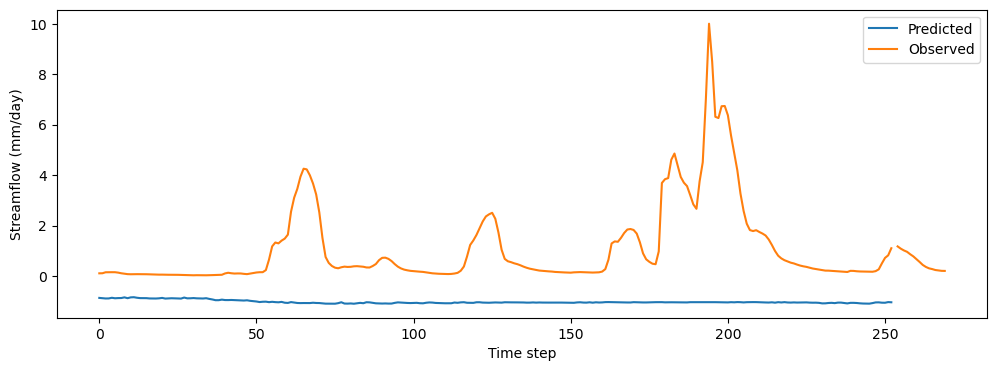

In [47]:
observed = historical_dynamic_tensor[..., 0:1]  # if first feature is QObs, otherwise use your obs array

plt.figure(figsize=(12,4))
plt.plot(y_hat[0, :, 0].cpu().numpy(), label="Predicted")
plt.plot(observed[0, :, 0].cpu().numpy(), label="Observed")
plt.xlabel("Time step")
plt.ylabel("Streamflow (mm/day)")
plt.legend()
plt.show()

Preguntas:
* Debería dar mas de 270 entradas?
* Debería precalentar el modelo? No tiene sentido estar teniendo outputs negativas